# Linear Regression 
=========================

## Bias and Variance - Trying to fit a linear model to high order polynomial data
*This example demonstrates how we can partition our dataset into training,validation and test sets to choose hyperparameters and determine how well our model generalises and predicts unseen samples *

### Import libraries 
We will mostly be using numpy for mathematical operations and matplotlib to produce plots 

In [51]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io as sio
import scipy.optimize as opt

In [52]:
mat = sio.loadmat("../data/ex5data1")
Xdata = mat['X']
y = mat['y'].flatten()

In [53]:
# Validation and Test Data
# (21,1)
Xval  = mat['Xval']
yval  = mat['yval'].flatten()
Xtest = mat['Xtest']
ytest = mat['ytest'].flatten()


# Size of dataset
m     = np.shape(Xdata)[0] # samples
mtest = np.shape(Xtest)[0] # samples in Xval and Xtest sets
n     = np.shape(Xdata)[1] # features 

# Feature Matrix
X     = np.column_stack((np.ones(m),Xdata))
Xval  = np.column_stack((np.ones(mtest),Xval))
Xtest = np.column_stack((np.ones(mtest),Xtest))

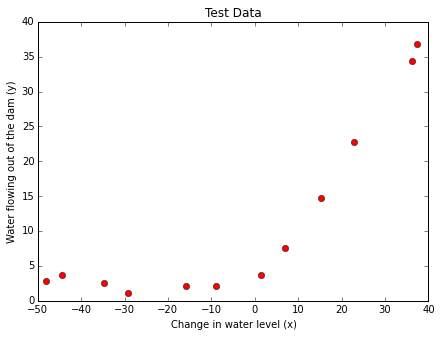

In [54]:
#  --- Plot test data --- #
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.plot(Xdata,y, 'ro')
plt.title('Test Data')
plt.xlabel('Change in water level (x)') 
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

Clearly a linear model is not going to fit this data but lets try anyway!

### Cost Function + Gradient

In [55]:
def linearRegCostFunction(theta,X, y, Lambda,m):

    # Regularised Linear Regression Cost Function
    H = np.dot(X,theta) 
    J = (1./(2*m))*np.sum(np.square(H-y)) + (float(Lambda)/(2*m))*np.sum(np.square(theta[1:]))

    # Regularised Linear Regression Gradient
    theta_reg = np.array([np.insert(theta[1:len(theta)],0,0)])
    grad = (1./m) * np.dot( X.T, H - y) + ( float(Lambda) / m )*theta_reg

    return J,grad[0]

Initialise $\theta$ (with $1$s) and calculate the cost and gradient

In [56]:
theta = [1 , 1]
J,grad = linearRegCostFunction(theta,X, y, 1,m)
print 'Cost at theta = [1 ; 1]: (this value should be about 303.993192)\n', J
print 'Gradient at theta = [1 ; 1]: (this value should be about [-15.303016; 598.250744])\n', grad

Cost at theta = [1 ; 1]: (this value should be about 303.993192)
303.99319222
Gradient at theta = [1 ; 1]: (this value should be about [-15.303016; 598.250744])
[ -15.30301567  598.25074417]


### Train and Plot Hypothesis

Run optimisation, here we use L-BFGS which works efficiency when you have a small number of features.

In [57]:
def train(X,y,Lambda,m):
    init_theta = np.zeros((X.shape[1], 1))
    args=(X,y,Lambda,m)
    return opt.minimize(linearRegCostFunction, x0=init_theta, args=args, 
                        options={'disp': False, 'maxiter':200}, method="L-BFGS-B", jac=True)["x"]

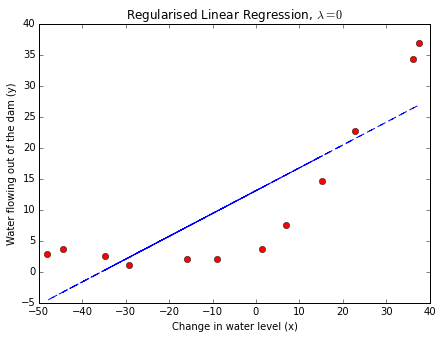

In [58]:
theta = train(X,y,0,m)
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
h = np.dot(X,theta) 
plt.plot(Xdata,y, 'ro')
plt.plot(Xdata,h,'b--')
plt.xlabel('Change in water level (x)') 
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Regularised Linear Regression, $\lambda=0$')
plt.show()

For these training points, this is roughly the best linear model that we can produce.

### Training vs Cross-Validation

The cost of our hypothesis on the training set doesn't tell us how well the model generalises for unseen data. A very low training cost could be a result of <i>overfitting</i> which can lead to poor prediction of new data, this is a problem known as <i>high variance</i>. However, a low cost could mean that the model is a poor fit of the data, known as a <i>high bias</i> problem. To get a better idea of how good our model is, we can look at the learning curve which calculates the cost on the training set and validation set as we increase the number of samples in the training set.

In [59]:
def learning_curve(X, y, Xval, yval, Lambda,m):
    # Error/Cost vs number of training samples
    error_train = np.zeros((m, 1))
    error_val   = np.zeros((m, 1))

    for i in xrange(1,m+1):

        X_train = X[:i]
        y_train = y[:i]

        theta = train(X_train, y_train, Lambda,m)

        error_train[i-1],_ = linearRegCostFunction(theta, X_train, y_train,   0, np.shape(X_train)[0])
        error_val[i-1],_   = linearRegCostFunction(theta, Xval, 	 yval,    0, np.shape(Xval)[0])

    return error_train, error_val

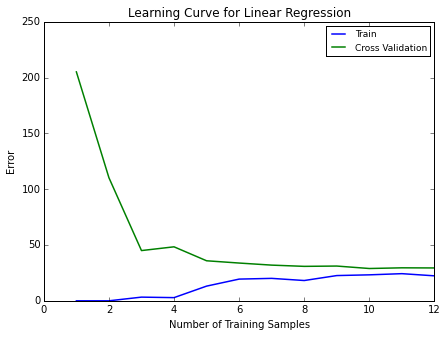

In [60]:
# -- Calculate and show learning curve -- #
Lambda = 0
error_train, error_val = learning_curve(X, y, Xval, yval, Lambda,m)
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
sample_range = np.arange(1,m+1)
plt.plot(sample_range,error_train,linewidth=1.5,label='Train')
plt.plot(sample_range,error_val,linewidth=1.5,label='Cross Validation')
plt.xlabel('Number of Training Samples')
plt.ylabel('Error')
plt.title('Learning Curve for Linear Regression')
plt.legend(loc="best", prop={'size':9})
plt.show()

From the above plot we can observe that, as the number of training samples increases, the training error also increases. This is a sign of a high bias problem - the model is too simple to represent the more complex data. As we would expect the cross-validation error starts high, as there are few samples to train on, and decrease as we try to learn a better fitted model. In this case both the training error and cross-validation error begin to level off due to the fact that the model starts to only make small changes for increasing number of training samples. The linear model can not represent the higher order polynomial data and increasing the number of training samples will not make any difference. 